# Pymaceuticals Inc.

In [27]:
#imports dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


#creates the path to the data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#reads the mouse metadata and study results files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#combines the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "inner")

#displays the data table
mouse_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
#checks the number of mice
num_of_mice = mouse_results["Mouse ID"].nunique()
num_of_mice


249

In [29]:
#checks for duplicated mice based on ID number and Timepoint

#groups by Mouse ID and Timepoint and then counts each occurence 
grouped_counts = mouse_results.groupby(["Mouse ID", "Timepoint"]).size()

#filters to find groups with more than 1 occurence
duplicated_groups = grouped_counts[grouped_counts > 1]

#extracts the Mouse IDs that have duplicates
duplicate_mouse_ids = duplicated_groups.index.get_level_values("Mouse ID").unique()
duplicate_mouse_ids


Index(['g989'], dtype='object', name='Mouse ID')

In [30]:
#optional gets all the data for the duplicated mouse ID
duplicated_mouse = mouse_results.loc[mouse_results["Mouse ID"] == "g989", :]
duplicated_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
#drops the duplicated mouse by its ID and creates a clean DataFrame
dropped_mouse_id = "g989"
cleaned_results = mouse_results.loc[mouse_results["Mouse ID"] != dropped_mouse_id]
cleaned_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
#checks the number of mice in the cleaned results
num_of_mice = cleaned_results["Mouse ID"].nunique()
num_of_mice


248

## Summary Statistics

In [33]:
#creates a DataFrame that is grouped by Drug Regimen
grouped_results = cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"]

#creates a summary statistics table of mean, median, variance, standard deviation, and standard error of the tumor based on Drug Regimen
mean = grouped_results.mean()
median = grouped_results.median()
variance = grouped_results.var()
stdev = grouped_results.std()
standard_error = grouped_results.sem()

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev": stdev,
    "Tumor Volume Std. Err.": standard_error
})
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
summary_statistics = grouped_results.agg(
    mean = "mean",
    median = "median",
    var = "var",
    std = "std",
    sem = "sem"
)
summary_statistics


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


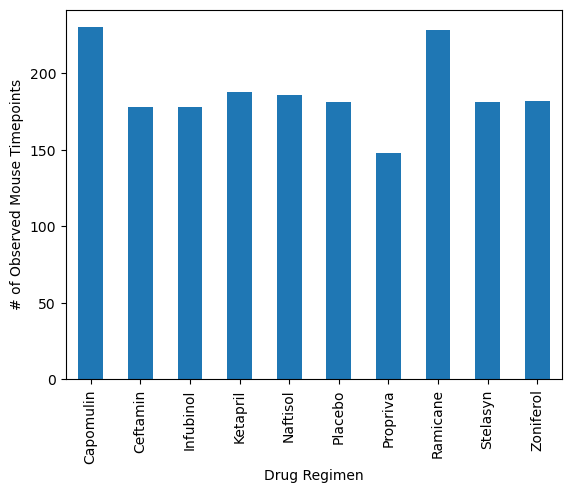

In [35]:
#creates a bar plot for the total number of rows for each drug regimen using pandas
regimen_counts = grouped_results.size()
observation_chart_pd = regimen_counts.plot(kind = "bar",
                                           ylabel = "# of Observed Mouse Timepoints")


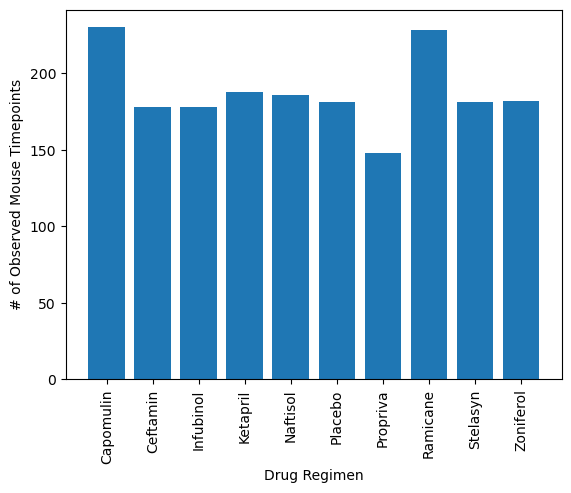

In [36]:
#creates a bar plot for the total number of rows for each drug regimen using pyplot
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


<Axes: ylabel='count'>

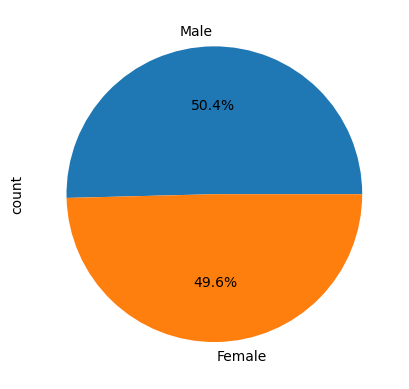

In [37]:
#gets all the unique mice by dropping any duplicate ids
unique_mice = cleaned_results[["Mouse ID", "Sex"]].drop_duplicates()

#counts the gender for the pie chart
gender_count = unique_mice["Sex"].value_counts()

#creates a pie chart based on gender of mice used in the experiment using pandas
gender_count.plot(kind = "pie", autopct = "%1.1f%%")


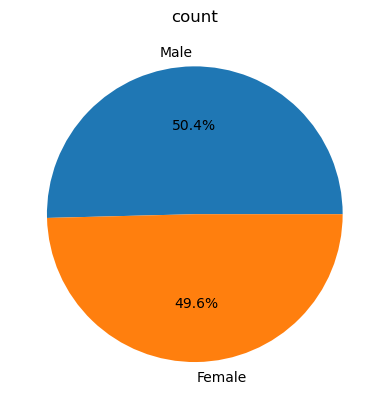

In [38]:
#creates a pie chart based on gender of mice used in the experiment using pyplot
plt.pie(gender_count, labels = gender_count.index, autopct = "%1.1f%%")
plt.title("count")
plt.show()


In [39]:
#gets the final tumor volume using the last timepoint and then merging the data
last_timepoint = cleaned_results.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, cleaned_results, on=["Mouse ID", "Timepoint"])


In [40]:
#creates a list for specific treatments
specific_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#creates an empty list for tumor volume
tumor_volume_data = []

#calculates the IQR and determines if their are outliers
for treatment in specific_treatments:
    
    #locates the rows which contain mice on each drug and gets the tumor values
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    #creates a subset for tumor volume data that is added to list
    tumor_volume_data.append(treatment_data)

    #calculates IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    #determines if there are outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    #prints out where or not their is an outlier
    print(f"{treatment} potential outliers: {treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


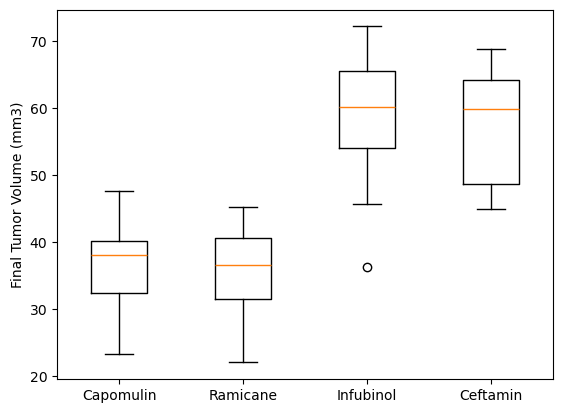

In [41]:
#creates a boxplot using my calculations above
plt.boxplot(tumor_volume_data, labels = specific_treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

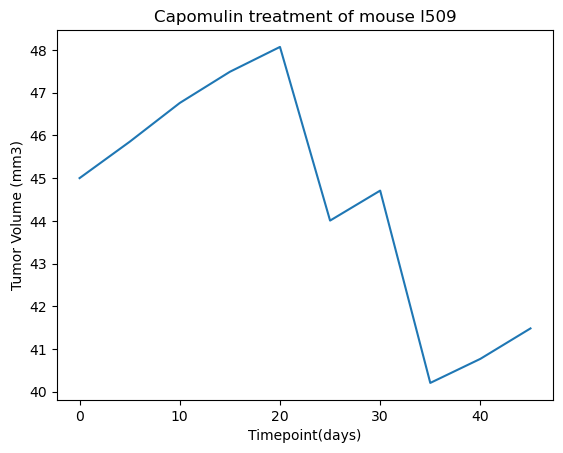

In [42]:
#defines the treatment and mouse ID
treatment = "Capomulin"
mouse_id = "l509"
mouse_data = cleaned_results.loc[(cleaned_results["Drug Regimen"] == treatment) & (cleaned_results["Mouse ID"] == mouse_id)]

#creates a line plot using the specific treatment and mouse ID
plt.plot(mouse_data["Timepoint"], 
         mouse_data["Tumor Volume (mm3)"], 
         linestyle = "-")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

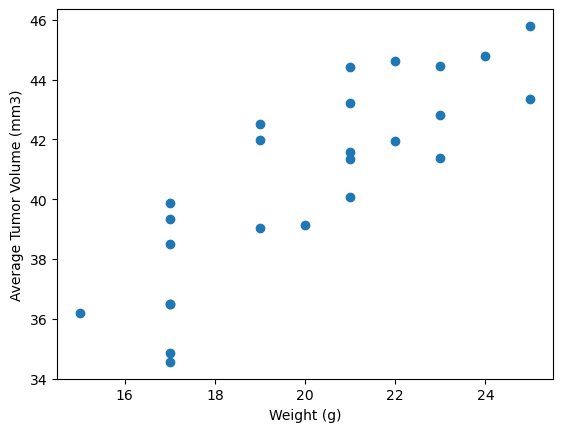

In [43]:
#calculates the average tumor volume per mouse on the Capomulin treatment
capomulin_treatments = cleaned_results.loc[cleaned_results["Drug Regimen"] == "Capomulin"]
average_tumor_volume_capomulin = capomulin_treatments.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

#create a merged data frame using the average tumor volume and the mouse metadata csv file
merged_df = pd.merge(average_tumor_volume_capomulin, mouse_metadata, on = "Mouse ID")

plt.scatter(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation between mouse weight and the average tumor volume is 0.84
The linear regression equation is y = 0.95x + 21.55


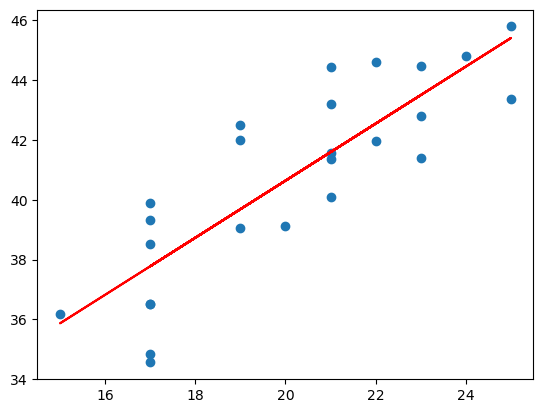

In [53]:
#adds teh linear regression equation and line to the plot
x_values = merged_df["Weight (g)"]
y_values = merged_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linreg_eq = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linreg_eq, (6, 1), fontsize = 15, color = "red")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
print(f"The linear regression equation is {linreg_eq}")
plt.show()
